## Limpieza de los datos

### Carga de librerías y del conjunto de datos

Importamos las librerías necesarias:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

Cargamos los datos originales:

In [2]:
dataset = pd.read_csv("../data/madrid-rent-prices_raw.csv")
dataset.head()

,_id,zipCode,buildingType,buildingSubtype,clientId,clientTypeId,dateOriginal,bathrooms,balcony,air_conditioner,...,isPackPremiumPriority,isNewConstruction,hasOpenHouse,isOpportunity,minPrice,otherFeaturesCount,price,periodicityId,history,lastAccess
0,1,28023.0,Flat,GroundFloorWithGarden,id-1,3,2022-02-24,2.0,NaN,NaN,...,True,False,False,False,0,15,1325.0,3,"[{'date': '2022-04-04', 'price': 1325}]",2022-04-11 07:48:19.078000
1,2,28023.0,Flat,Flat,id-1,3,2022-02-23,2.0,NaN,NaN,...,True,False,False,False,0,15,1120.0,3,"[{'date': '2022-04-04', 'price': 1120}]",2022-04-11 07:48:19.139000
2,3,28052.0,Flat,GroundFloorWithGarden,id-2,3,2022-03-10,2.0,NaN,NaN,...,True,False,False,False,0,18,1095.0,3,"[{'date': '2022-04-04', 'price': 1095}]",2022-04-11 07:49:27.115000
3,4,28050.0,Flat,Flat,id-2,3,2022-03-01,2.0,NaN,NaN,...,True,False,False,False,0,17,1045.0,3,"[{'date': '2022-04-04', 'price': 1045}]",2022-04-11 07:48:19.195000
4,5,28001.0,Flat,Flat,id-3,3,2022-02-24,3.0,1.0,1.0,...,True,False,False,False,0,19,6550.0,3,"[{'date': '2022-04-04', 'price': 6550}]",2022-04-11 07:48:19.251000


### Valores nulos

Lo primero que vamos a comprobar los valores nulos existentes en el dataset:

In [3]:
dataset.isnull().sum()

_id                         0
zipCode                     1
buildingType                0
buildingSubtype             0
clientId                    0
clientTypeId                0
dateOriginal                0
bathrooms                  55
balcony                  6197
air_conditioner          2240
heater                   2060
heating                  6731
swimming_pool            6451
parking                  6383
conservationState        3072
floor                    2279
terrace                  5363
elevator                 2359
rooms                     265
surface                    33
isHighlighted               0
isPackPremiumPriority       0
isNewConstruction           0
hasOpenHouse                0
isOpportunity               0
minPrice                    0
otherFeaturesCount          0
price                      25
periodicityId               0
history                     0
lastAccess                  0
dtype: int64

Lo primero que vemos es que ciertas características como _bathrooms_, _balcony_, _heater_, .. son obtenidas de valores específicos del alojamiento, y a la hora de crear el conjunto de datos si este no lo tiene no registro ningún valor:

In [4]:
features = ['bathrooms', 'balcony', 'air_conditioner', 'heater', 'heating', 'swimming_pool', 'parking', 'conservationState', 'floor', 'terrace', 'elevator', 'rooms']

for feat in features:
    print(feat + ':')
    print(pd.unique(dataset[feat]))

bathrooms:
[ 2.  3.  1.  5.  4. nan  6.  7.  8.]
balcony:
[nan  1.]
air_conditioner:
[nan  1.]
heater:
[nan  1.]
heating:
[nan  1.]
swimming_pool:
[nan  1.]
parking:
[nan  1.]
conservationState:
[ 1. nan  3.  2.  4.  8.]
floor:
[ 3.  6.  8.  7. nan 11.  9. 10. 21. 12. 14. 13.  1. 16. 15. 17.  2. 20.
  5. 18.  4. 19.]
terrace:
[ 1. nan]
elevator:
[ 1. nan]
rooms:
[ 2.  3.  1.  5.  4. nan  7.  6.  9. 15.  8. 11.]


Por ello vamos a definir estos valores a cero en cada una de estas las características:

In [5]:
for feat in features:
    dataset[feat] = dataset[feat].fillna(0)

Por otro lado, tenemos en las variables _surface_, _zipCode_ y _price_ algunos valores que no quedaron registrados generando nulos. Para solventar esto aplicaremos una imputación de valores mediante el algoritmo KNN, observando los 5 valores más cercanos y asignando el valor que le corresponda. Todo esto bajo la premisa de que los registros más cercanos tendrán un valor semejante al real por lo que a través de ellos se puede imputar dicho valor.


Para esto usaremos las variables numéricas que tiene el conjunto original debido a que el algoritmo KNN es un algoritmo que trabaja con distancias, por lo que es necesario aplicarlo usando valores numéricos:

In [6]:
features2Imp = ['surface', 'zipCode', 'price']
all_features = ['zipCode', 'clientTypeId', 'bathrooms', 'balcony', 'air_conditioner', 'heater', 'heating', 'swimming_pool', 'parking', 'conservationState', 'floor', 'terrace', 'elevator', 'rooms', 'surface', 'minPrice', 'otherFeaturesCount', 'price','periodicityId']

knn = KNNImputer(n_neighbors=5)
dataset[all_features] = knn.fit_transform(dataset[all_features])

Con esto ya tenemos todos nuestros datos nulos imputados:

In [7]:
dataset.isnull().sum()

_id                      0
zipCode                  0
buildingType             0
buildingSubtype          0
clientId                 0
clientTypeId             0
dateOriginal             0
bathrooms                0
balcony                  0
air_conditioner          0
heater                   0
heating                  0
swimming_pool            0
parking                  0
conservationState        0
floor                    0
terrace                  0
elevator                 0
rooms                    0
surface                  0
isHighlighted            0
isPackPremiumPriority    0
isNewConstruction        0
hasOpenHouse             0
isOpportunity            0
minPrice                 0
otherFeaturesCount       0
price                    0
periodicityId            0
history                  0
lastAccess               0
dtype: int64

### Valores extremos

A continuación el paso que hacemos es ver un resumen de las variables numéricas:

In [8]:
dataset.describe()

,_id,zipCode,clientTypeId,bathrooms,balcony,air_conditioner,heater,heating,swimming_pool,parking,conservationState,floor,terrace,elevator,rooms,surface,minPrice,otherFeaturesCount,price,periodicityId
count,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.000000,7062.0,7062.000000,7062.000000,7062.000000
mean,3531.500000,28018.494364,2.766922,1.568111,0.122487,0.682809,0.708298,0.046871,0.086519,0.096148,1.305013,4.963750,0.240583,0.665959,2.112716,94.221325,0.0,7.360804,1699.661088,2.989380
std,2038.768133,285.854103,0.641786,0.854749,0.327870,0.465415,0.454578,0.211377,0.281149,0.294816,1.543910,4.338246,0.427468,0.471688,1.156882,74.637184,0.0,5.075784,2707.013686,0.178192
min,1.000000,4621.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,375.000000,0.000000
25%,1766.250000,28007.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,55.000000,0.0,4.000000,900.000000,3.000000
50%,3531.500000,28016.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,1.000000,2.000000,75.000000,0.0,6.000000,1250.000000,3.000000
75%,5296.750000,28034.000000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,1.000000,3.000000,110.000000,0.0,10.000000,1903.000000,3.000000
max,7062.000000,33201.000000,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,21.000000,1.000000,1.000000,15.000000,1700.000000,0.0,28.000000,170000.000000,3.000000


A partir de aquí trabajaremos con dos variables las cuales pueden tener determinados valores fuera de los normal. La primera de las variables a estudiar es nuestra variable *price*. Mostrando el diagrama de cajas vemos como existen dos puntos que superan el valor 100000, considerándolos _outliers_ (ya que se aleja bastante del 3 cuartil) obtenemos el siguiente resultado:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95bdb695e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95bdb69ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95bdb69280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95bdb723a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95bdb726a0>],
 'means': []}

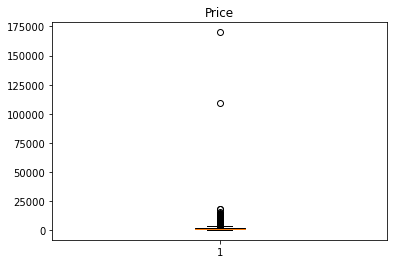

In [9]:
fig, ax = plt.subplots()
ax.set_title('Price')
ax.boxplot(dataset.price)

Si los eliminamos:

In [10]:
dataset = dataset[dataset.price < 25000]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95bdbb1f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95bdbbf610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95bdbb1bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95bdbbfcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95bdbbffd0>],
 'means': []}

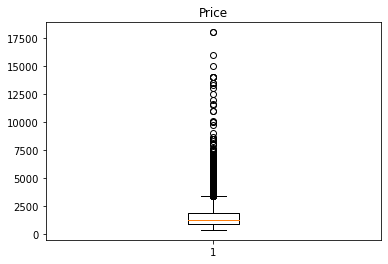

In [11]:
fig, ax = plt.subplots()
ax.set_title('Price')
ax.boxplot(dataset.price)

Con esto podemos ver que existen valores que siguen superando este nuevo tercer cuartil pero, están mucho más cerca del comportamiento global.

En el caso de la segunda variable, la variable *surface*, vemos que existen algunos valores que también se alejan por la parte superior del conjunto global:

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95bdb5d6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95bdb5dd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95bdb5d340>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95bdaea460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95bdaea760>],
 'means': []}

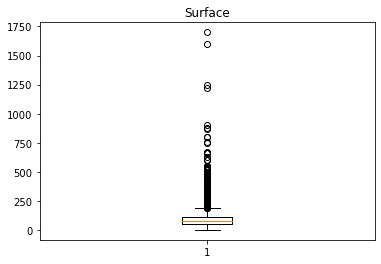

In [12]:
fig, ax = plt.subplots()
ax.set_title('Surface')
ax.boxplot(dataset.surface)

Por esto mismo, eliminamos estos valores extremos:

In [13]:
dataset = dataset[dataset.surface < 1000]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f95bd72fb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f95bd73c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f95bd72f7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f95bd73c910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f95bd73cc10>],
 'means': []}

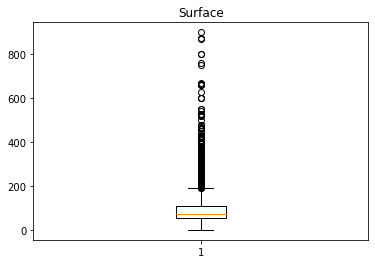

In [14]:
fig, ax = plt.subplots()
ax.set_title('Surface')
ax.boxplot(dataset.surface)

### Conjunto final

Con todo los procedimientos realizados anteriormente obtenemos el siguiente resultado:

In [15]:
dataset.head()

,_id,zipCode,buildingType,buildingSubtype,clientId,clientTypeId,dateOriginal,bathrooms,balcony,air_conditioner,...,isPackPremiumPriority,isNewConstruction,hasOpenHouse,isOpportunity,minPrice,otherFeaturesCount,price,periodicityId,history,lastAccess
0,1,28023.0,Flat,GroundFloorWithGarden,id-1,3.0,2022-02-24,2.0,0.0,0.0,...,True,False,False,False,0.0,15.0,1325.0,3.0,"[{'date': '2022-04-04', 'price': 1325}]",2022-04-11 07:48:19.078000
1,2,28023.0,Flat,Flat,id-1,3.0,2022-02-23,2.0,0.0,0.0,...,True,False,False,False,0.0,15.0,1120.0,3.0,"[{'date': '2022-04-04', 'price': 1120}]",2022-04-11 07:48:19.139000
2,3,28052.0,Flat,GroundFloorWithGarden,id-2,3.0,2022-03-10,2.0,0.0,0.0,...,True,False,False,False,0.0,18.0,1095.0,3.0,"[{'date': '2022-04-04', 'price': 1095}]",2022-04-11 07:49:27.115000
3,4,28050.0,Flat,Flat,id-2,3.0,2022-03-01,2.0,0.0,0.0,...,True,False,False,False,0.0,17.0,1045.0,3.0,"[{'date': '2022-04-04', 'price': 1045}]",2022-04-11 07:48:19.195000
4,5,28001.0,Flat,Flat,id-3,3.0,2022-02-24,3.0,1.0,1.0,...,True,False,False,False,0.0,19.0,6550.0,3.0,"[{'date': '2022-04-04', 'price': 6550}]",2022-04-11 07:48:19.251000


El cual guardamos en nuestra carpeta *data*:

In [16]:
dataset.to_csv("../data/madrid-rent-prices_cleaned.csv")